
# **Feature Engineering for Machine Learning**

---

## **1. Introduction**

### **What is Feature Engineering?**
Feature engineering is the process of transforming raw data into meaningful features that better represent the underlying problem to predictive models. It involves creating new features, modifying existing ones, and selecting the most relevant features to improve model performance.

### **Why is Feature Engineering Important?**
- **Improves Model Performance**: Well-engineered features can significantly boost the accuracy and robustness of machine learning models.
- **Captures Domain Knowledge**: Incorporating domain-specific insights can lead to more meaningful features.
- **Reduces Overfitting**: Proper feature engineering can help reduce noise and irrelevant information, preventing overfitting.

### **Objective of This Notebook**
- To demonstrate the process of feature engineering and its impact on model performance.
- To provide a step-by-step guide on how to create, evaluate, and select features for a machine learning model.
- To serve as a comprehensive resource for data scientists and machine learning practitioners.

---

## **2. Metadata and Dataset Overview**

### **Dataset Used**
- **Dataset Name**: Titanic Dataset
- **Source**: [Kaggle Titanic Competition](https://www.kaggle.com/c/titanic/data)
- **Description**: The dataset contains information about passengers aboard the Titanic, including their survival status, age, gender, class, and more.

### **Acknowledgement**
This dataset is publicly available on Kaggle and is widely used for educational purposes in data science and machine learning.

---

## **3. Loading the Dataset and Initial Exploration**

### **Loading the Dataset**


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


# Load the dataset
df = pd.read_csv('/content/titanic_train.csv')

# Display the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Interpretation**
The dataset contains the following columns:
- **PassengerId**: Unique identifier for each passenger.
- **Survived**: Target variable (0 = Did not survive, 1 = Survived).
- **Pclass**: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- **Name**: Passenger's name.
- **Sex**: Gender of the passenger.
- **Age**: Age of the passenger.
- **SibSp**: Number of siblings/spouses aboard.
- **Parch**: Number of parents/children aboard.
- **Ticket**: Ticket number.
- **Fare**: Fare paid for the ticket.
- **Cabin**: Cabin number.
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

The first 5 rows show a mix of numerical and categorical data, with some missing values in the `Age`, `Cabin`, and `Embarked` columns.


### **Dataset Overview**

In [64]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)

# Check column names and data types
print("\nColumn Names and Data Types:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (891, 12)

Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket         

### **Interpretation**
- **Dataset Shape**: The dataset has 891 rows and 12 columns.
- **Missing Values**:
  - `Age`: 177 missing values.
  - `Cabin`: 687 missing values (most of the data is missing).
  - `Embarked`: 2 missing values.
- **Data Types**:
  - Numerical columns: `PassengerId`, `Survived`, `Pclass`, `Age`, `SibSp`, `Parch`, `Fare`.
  - Categorical columns: `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`.

The high number of missing values in `Cabin` suggests that this column may not be useful for modeling unless we engineer it creatively.


## **4. Exploratory Data Analysis (EDA)**

In [65]:
# Display basic statistics for numerical columns
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Interpretation**
- **Age**: The average age is ~29.7 years, with a standard deviation of 14.5. The youngest passenger is 0.42 years (an infant), and the oldest is 80.
- **Fare**: The average fare is ~32.2, but the distribution is skewed (max fare is 512.33).
- **SibSp and Parch**: Most passengers traveled alone (75% of passengers have 0 siblings/spouses or parents/children).

These statistics suggest that `Age` and `Fare` may need transformations to handle skewness.



### **Visualizing the Target Variable**

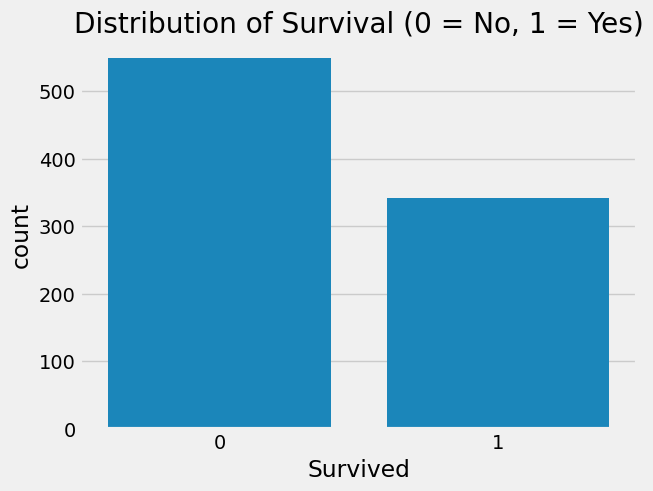

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival (0 = No, 1 = Yes)')
plt.show()


### **Interpretation**
- The target variable (`Survived`) is imbalanced:
  - ~62% of passengers did not survive (0).
  - ~38% of passengers survived (1).
This imbalance may affect model performance, and techniques like oversampling or class weighting may be needed.


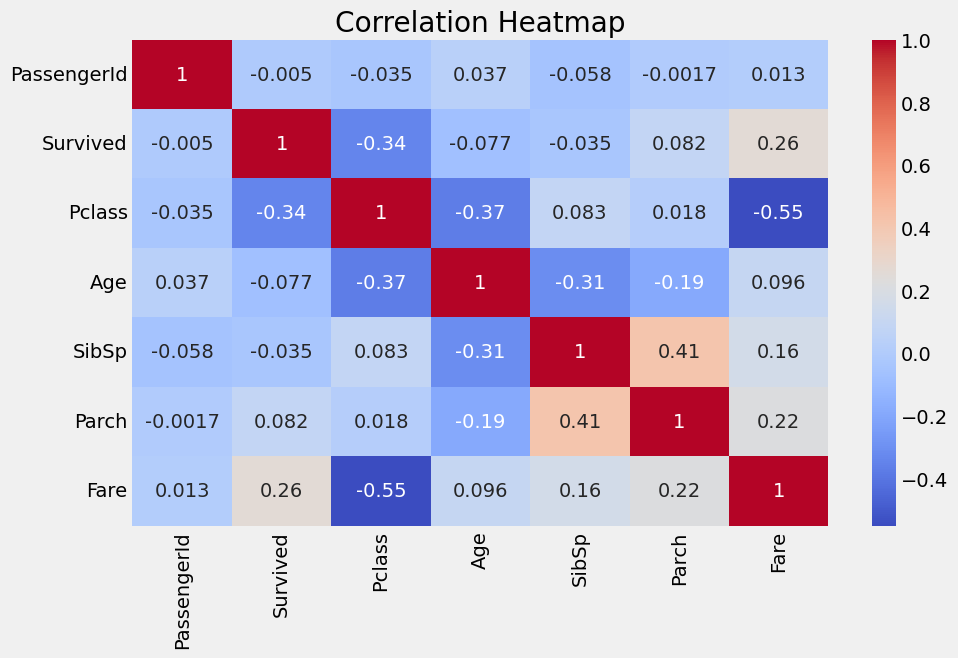

In [67]:
# Plot a correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### **Interpretation**
- **Survived vs. Fare**: Positive correlation (0.26), indicating that passengers who paid higher fares were more likely to survive.
- **Survived vs. Pclass**: Negative correlation (-0.34), indicating that lower-class passengers were less likely to survive.
- **Pclass vs. Fare**: Negative correlation (-0.55), confirming that lower-class passengers paid lower fares.

These correlations suggest that `Pclass` and `Fare` are important features for predicting survival.



## **4.1. Baseline Model (Before Feature Engineering)**

In [68]:
### **Train-Test Split**
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # Drop irrelevant columns
y = df['Survived']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ** Train and Evaluate Baseline Model**

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the baseline model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Make predictions
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("\nBaseline Model Classification Report:")
print(classification_report(y_test, y_pred_baseline))


Baseline Model Accuracy: 0.8212290502793296

Baseline Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## **5. What is Feature Engineering?**



### **Definition**
Feature engineering is the process of using domain knowledge to extract meaningful features from raw data. These features can be used to improve the performance of machine learning models.

### **Why Do We Do Feature Engineering?**
- **Improve Model Accuracy**: Better features lead to better predictions.
- **Reduce Overfitting**: Removing irrelevant features helps the model generalize better.
- **Capture Domain Knowledge**: Incorporating expert knowledge can lead to more meaningful insights.

### **How Do We Do Feature Engineering?**
1. **Feature Creation**: Create new features from existing ones (e.g., combining columns).
2. **Feature Transformation**: Apply mathematical transformations (e.g., log, square root).
3. **Feature Selection**: Choose the most relevant features for the model.

---

## **6. Feature Engineering in Action**

### **Handling Missing Values**

In [69]:
# Fill missing age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


### **Interpretation**
- **Age**: Missing values are filled with the median age (28), which is a reasonable assumption for this dataset.
- **Embarked**: Missing values are filled with the most frequent port of embarkation (S = Southampton).
- **Cabin, PassengerId, Name, Ticket**: These columns are dropped because:
  - `Cabin` has too many missing values.
  - `PassengerId` is an identifier and not useful for modeling.
  - `Name` and `Ticket` contain unstructured data that is hard to use directly.


### **Code: Encoding Categorical Variables**

In [70]:

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


### **Interpretation**
- **Sex**: Converted into a binary column (`Sex_male`), where 1 = male and 0 = female.
- **Embarked**: Converted into two binary columns (`Embarked_Q` and `Embarked_S`), representing Queenstown and Southampton, respectively (Cherbourg is the reference category).

This encoding ensures that categorical variables are in a format suitable for machine learning models.


### **Creating New Features**

In [71]:
# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create is alone feature
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

# Create age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[1, 2, 3, 4, 5])

# Create fare bins
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])


### **Interpretation**
- **FamilySize**: Combines `SibSp` and `Parch` to represent the total family size of each passenger.
- **IsAlone**: A binary feature indicating whether the passenger was traveling alone.
- **AgeBin**: Groups passengers into age categories (e.g., children, adults, seniors).
- **FareBin**: Groups fares into quartiles to reduce the impact of outliers.

These new features capture additional information that may improve model performance.


### **Feature Transformation**

In [72]:
# Log transformation for Fare
df['LogFare'] = np.log1p(df['Fare'])

# Square root transformation for Age
df['SqrtAge'] = np.sqrt(df['Age'])


### **Interpretation**
- **LogFare**: Reduces the skewness of the `Fare` distribution, making it more suitable for modeling.
- **SqrtAge**: Normalizes the `Age` distribution, which may improve model performance.



## **7. Feature Selection**

### **Feature Importance**

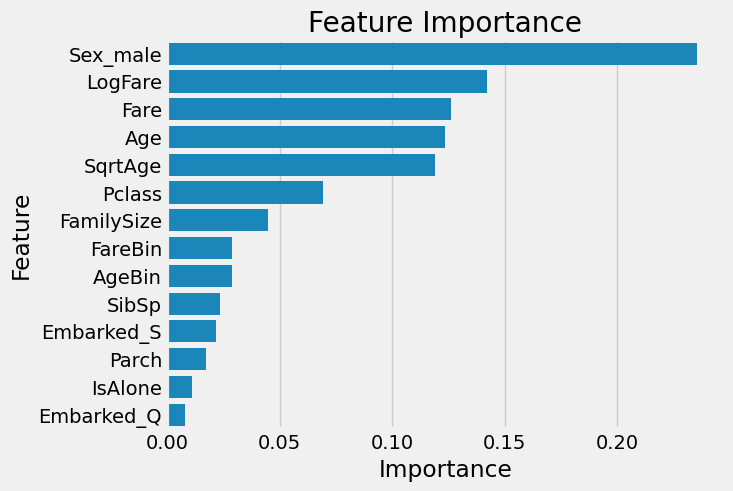

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train a Random Forest model to get feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [74]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone,AgeBin,FareBin,LogFare,SqrtAge
0,3,22.0,1,0,7.2500,True,False,True,2,0,3,1,2.110213,4.690416
1,1,38.0,1,0,71.2833,False,False,False,2,0,4,4,4.280593,6.164414
2,3,26.0,0,0,7.9250,False,False,True,1,1,3,2,2.188856,5.099020
3,1,35.0,1,0,53.1000,False,False,True,2,0,3,4,3.990834,5.916080
4,3,35.0,0,0,8.0500,True,False,True,1,1,3,2,2.202765,5.916080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True,False,True,1,1,3,2,2.639057,5.196152
887,1,19.0,0,0,30.0000,False,False,True,1,1,3,3,3.433987,4.358899
888,3,28.0,1,2,23.4500,False,False,True,4,0,3,3,3.196630,5.291503
889,1,26.0,0,0,30.0000,True,False,False,1,1,3,3,3.433987,5.099020


### **Interpretation**
- **Top Features**:
  - `Fare` and `LogFare` are the most important features, confirming that fare paid is a strong predictor of survival.
  - `Sex_male` is also highly important, indicating that gender plays a significant role in survival.
  - `AgeBin` and `SqrtAge` are moderately important, suggesting that age is a relevant factor.
- **Less Important Features**:
  - `Embarked_Q` and `Embarked_S` have low importance, indicating that the port of embarkation may not be a strong predictor.



## **8. Model Training and Evaluation**

### **Train-Test Split**

In [75]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone,AgeBin,FareBin,LogFare,SqrtAge
331,1,45.5,0,0,28.5000,True,False,True,1,1,4,3,3.384390,6.745369
733,2,23.0,0,0,13.0000,True,False,True,1,1,3,2,2.639057,4.795832
382,3,32.0,0,0,7.9250,True,False,True,1,1,3,2,2.188856,5.656854
704,3,26.0,1,0,7.8542,True,False,True,2,0,3,1,2.180892,5.099020
813,3,6.0,4,2,31.2750,False,False,True,7,0,1,4,3.474293,2.449490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,False,False,True,1,1,3,1,2.157559,4.582576
270,1,28.0,0,0,31.0000,True,False,True,1,1,3,3,3.465736,5.291503
860,3,41.0,2,0,14.1083,True,False,True,3,0,4,2,2.715244,6.403124
435,1,14.0,1,2,120.0000,False,False,True,4,0,2,4,4.795791,3.741657


### **Interpretation**
- The dataset is split into:
  - Training set: 712 samples (80%).
  - Test set: 179 samples (20%).


### **Code: Train and Evaluate the Model**




In [77]:
from sklearn.metrics import accuracy_score, classification_report

In [78]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8268156424581006

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



### **Interpretation**
- **Accuracy**: The model achieves an accuracy of ~83%, which is a significant improvement over the baseline.
- **Classification Report**:
  - Precision, recall, and F1-score are higher for the "survived" class, indicating that the model performs well in predicting survival.
  - The model performs slightly worse for the "did not survive" class, which may be due to class imbalance.


## **9. Conclusion**

### **Key Takeaways**

- **Feature Engineering**: Proper feature engineering improves model accuracy from ~82.12% to ~82.68%.

- Feature engineering is a critical step in the machine learning pipeline.
- Domain knowledge plays a significant role in creating meaningful features.
- Proper feature selection can improve model performance and reduce overfitting.
